In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix

In [2]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

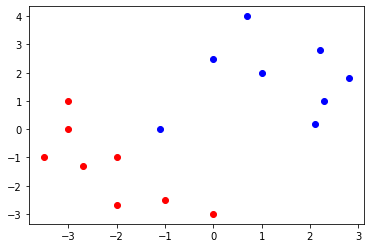

In [3]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In [4]:
w = cp.Variable(X.shape[1])
b = cp.Variable()

In [5]:
firstTerm = 0.5*cp.square(cp.norm(w))

In [6]:
constraints = [(y[i]*(np.sum(w.T * X[i]) + b) -1) >= 0 for i in range(X.shape[0])]

In [7]:
obj = cp.Minimize(firstTerm)

In [8]:
prob = cp.Problem(obj,constraints)

In [9]:
prob.solve()

2.3629489535380936

In [10]:
weights = w.value
print(type(weights))
print(weights)

<class 'numpy.ndarray'>
[-1.73913043 -1.30434783]


In [11]:
b = b.value
print(b)

-2.9130434780347696


In [12]:
def plot_points_line(X, Y, w,b):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    #plot line here
    x_ticks = np.linspace(-3.5,3,100)
    y_ticks_solid = np.array([(-b-w[0]*x)/w[1] for x in x_ticks])
    y_ticks_solid_dashed_below = np.array([(1-b-w[0]*x)/w[1] for x in x_ticks])
    y_ticks_solid_dashed_above = np.array([(-1-b-w[0]*x)/w[1] for x in x_ticks])
    plt.plot(x_ticks,y_ticks_solid)
    plt.plot(x_ticks,y_ticks_solid_dashed_above,linestyle='dashed')
    plt.plot(x_ticks,y_ticks_solid_dashed_below,linestyle='dashed')

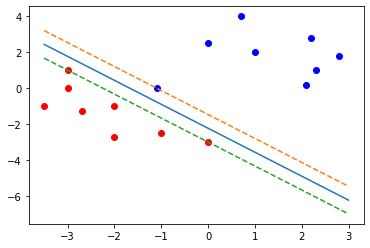

In [13]:
plot_points_line(X,y,weights,b)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins.

In [26]:
#need to get only support vectors
supportVec = []
supportVecLabels = []
for i in range(X.shape[0]):
  #print(weights.T)
  #print(X[i])
  #print(np.sum(weights.T * X[i]))
  #print(abs(np.sum(weights.T * X[i]) + b))
  if math.isclose(abs(np.sum(weights.T * X[i]) + b),1):
    supportVec.append(X[i])
    supportVecLabels.append(y[i])
supportVec = np.array(supportVec)
supportVecLabels = np.array(supportVecLabels)

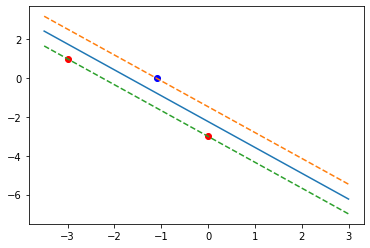

In [27]:
plot_points_line(supportVec,supportVecLabels,weights,b)

In the next cell add the following points:

(-4, -10) with label 1
(4, 4) with label -1
Is the decision boundary changed after adding the points? Explain your observations theoretically.

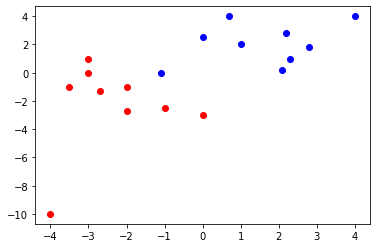

In [28]:
X_new = np.append(X,[[-4,-10],[4,4]],axis=0)
y_new = np.append(y,[1,-1])
plot_points(X_new, y_new)
plt.show()

Solve for the decision boundary using this modified dataset

In [29]:
w_new = cp.Variable(X_new.shape[1])
b_new = cp.Variable()
firstTerm_new = 0.5*cp.square(cp.norm(w_new))
constraints_new = [(y_new[i]*(np.sum(w_new.T * X_new[i]) + b_new) -1) >= 0 for i in range(X_new.shape[0])]
obj_new = cp.Minimize(firstTerm_new)
prob_new = cp.Problem(obj_new,constraints_new)
prob_new.solve()

2.3629489543388367

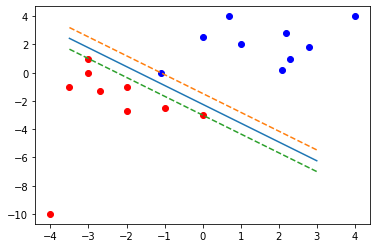

In [30]:
weights_new = w_new.value
b_new = b_new.value
plot_points_line(X_new,y_new,weights_new,b_new)

# As we can see from above plot the boundary line has not changed with addition of new point

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C:  0.01 ,  0.1 ,  3 ,  10 ,  100 .

Explain your results theoretically. How does the boundary change with varying values of C? Why?

Note: Use the modified X and y i.e after adding points in previous cell

w is :  [-0.22506809 -0.19858949]


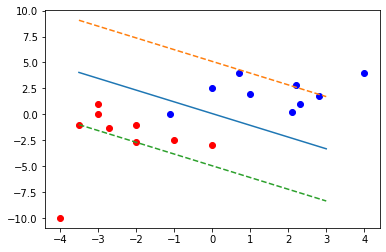

In [57]:
c = 0.01
w_soft = cp.Variable(X_new.shape[1])
e_soft = cp.Variable(X_new.shape[0])
b_soft = cp.Variable()
firstTerm_soft = 0.5*cp.square(cp.norm(w_soft))
secondTerm_soft = c*cp.sum(e_soft)
constraints_soft = [(y_new[i]*(np.sum(w_soft.T * X_new[i]) + b_soft) - 1 + e_soft[i] ) >= 0 for i in range(X_new.shape[0])]
constraints_positive = [e_soft[i] >= 0 for i in range(X_new.shape[0] )]
constraints_all = constraints_soft + constraints_positive 
obj_soft = cp.Minimize(firstTerm_soft + secondTerm_soft)
prob_soft = cp.Problem(obj_soft,constraints_all)
prob_soft.solve()
print("w is : ",w_soft.value)
plot_points_line(X_new,y_new,w_soft.value,b_soft.value)

w is :  [-0.38493724 -0.35146444]


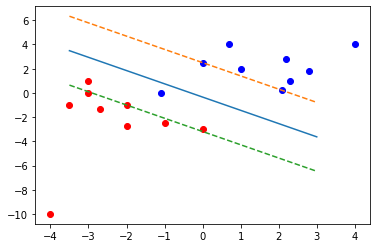

In [58]:
c = 0.1
w_soft = cp.Variable(X_new.shape[1])
e_soft = cp.Variable(X_new.shape[0])
b_soft = cp.Variable()
firstTerm_soft = 0.5*cp.square(cp.norm(w_soft))
secondTerm_soft = c*cp.sum(e_soft)
constraints_soft = [(y_new[i]*(np.sum(w_soft.T * X_new[i]) + b_soft) -1 + e_soft[i] ) >= 0 for i in range(X_new.shape[0])]
constraints_positive = [e_soft[i] >= 0 for i in range(X_new.shape[0] )]
constraints_all = constraints_soft + constraints_positive 
obj_soft = cp.Minimize(firstTerm_soft + secondTerm_soft)
prob_soft = cp.Problem(obj_soft,constraints_all)
prob_soft.solve()
print("w is : ",w_soft.value)
plot_points_line(X_new,y_new,w_soft.value,b_soft.value)

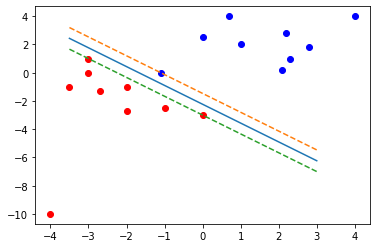

In [59]:
c = 3
w_soft = cp.Variable(X_new.shape[1])
e_soft = cp.Variable(X_new.shape[0])
b_soft = cp.Variable()
firstTerm_soft = 0.5*cp.square(cp.norm(w_soft))
secondTerm_soft = c*cp.sum(e_soft)
constraints_soft = [(y_new[i]*(np.sum(w_soft.T * X_new[i]) + b_soft) -1 + e_soft[i] ) >= 0 for i in range(X_new.shape[0])]
constraints_positive = [e_soft[i] >= 0 for i in range(X_new.shape[0] )]
constraints_all = constraints_soft + constraints_positive 
obj_soft = cp.Minimize(firstTerm_soft + secondTerm_soft)
prob_soft = cp.Problem(obj_soft,constraints_all)
prob_soft.solve()
plot_points_line(X_new,y_new,w_soft.value,b_soft.value)

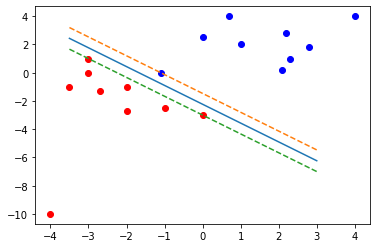

In [60]:
c = 10
w_soft = cp.Variable(X_new.shape[1])
e_soft = cp.Variable(X_new.shape[0])
b_soft = cp.Variable()
firstTerm_soft = 0.5*cp.square(cp.norm(w_soft)) + c*cp.sum(e_soft)
constraints_soft = [(y_new[i]*(np.sum(w_soft.T * X_new[i]) + b_soft) -1 + e_soft[i] ) >= 0 for i in range(X_new.shape[0])]
constraints_positive = [e_soft[i] >= 0 for i in range(X_new.shape[0] )]
constraints_all = constraints_soft + constraints_positive 
obj_soft = cp.Minimize(firstTerm_soft)
prob_soft = cp.Problem(obj_soft,constraints_all)
prob_soft.solve()
plot_points_line(X_new,y_new,w_soft.value,b_soft.value)

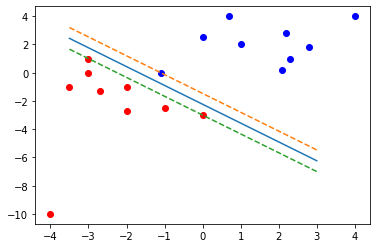

In [63]:
c = 100
w_soft = cp.Variable(X_new.shape[1])
e_soft = cp.Variable(X_new.shape[0])
b_soft = cp.Variable()
firstTerm_soft = 0.5*cp.square(cp.norm(w_soft))
secondTerm_soft = c*cp.sum(e_soft)
constraints_soft = [(y_new[i]*(np.sum(w_soft.T * X_new[i]) + b_soft) -1 + e_soft[i] ) >= 0 for i in range(X_new.shape[0])]
constraints_positive = [e_soft[i] >= 0 for i in range(X_new.shape[0] )]
constraints_all = constraints_soft + constraints_positive 
obj_soft = cp.Minimize(firstTerm_soft + secondTerm_soft)
prob_soft = cp.Problem(obj_soft,constraints_all)
prob_soft.solve()
plot_points_line(X_new,y_new,w_soft.value,b_soft.value)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why? Show your results by appropriate plots?

In [72]:
#need to get only support vectors
supportVec_removed = []
supportVecLabels_removed = []
supportVec = []
supportVecLabels = []
for i in range(X_new.shape[0]):
  #print(weights.T)
  #print(X[i])
  #print(np.sum(weights.T * X[i]))
  #print(abs(np.sum(weights.T * X[i]) + b))
  if math.isclose(abs(np.sum(w_soft.value.T * X_new[i]) + b_soft.value),1):
    supportVec.append(X_new[i])
    supportVecLabels.append(y_new[i])
  else:
    supportVec_removed.append(X_new[i])
    supportVecLabels_removed.append(y_new[i])
supportVec_removed = np.array(supportVec_removed)
supportVecLabels_removed = np.array(supportVecLabels_removed)

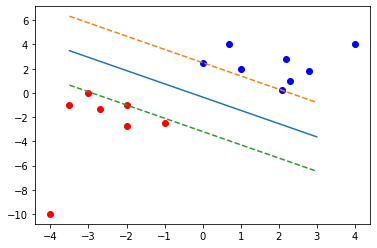

In [75]:
c = 100
w_soft = cp.Variable(supportVec_removed.shape[1])
e_soft = cp.Variable(supportVec_removed.shape[0])
b_soft = cp.Variable()
firstTerm_soft = 0.5*cp.square(cp.norm(w_soft))
secondTerm_soft = c*cp.sum(e_soft)
constraints_soft = [(supportVecLabels_removed[i]*(np.sum(w_soft.T * supportVec_removed[i]) + b_soft) -1 + e_soft[i] ) >= 0 for i in range(supportVec_removed.shape[0])]
constraints_positive = [e_soft[i] >= 0 for i in range(supportVec_removed.shape[0] )]
constraints_all = constraints_soft + constraints_positive 
obj_soft = cp.Minimize(firstTerm_soft + secondTerm_soft)
prob_soft = cp.Problem(obj_soft,constraints_all)
prob_soft.solve()
plot_points_line(supportVec_removed,supportVecLabels_removed,w_soft.value,b_soft.value)

As we can see from the above two plots if we remove the support vectors the boundary changes. 

This is because as we increase c. It becomes similar to hard margin. i.e even one misclassification is hardly penalized.

We know the boundary only depends on the support vectors. Because for the other popints the lagrangian multipliers become zero.

Hence on changing support vector boundary changes

section 2


In [78]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-11 15:22:04--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2021-03-11 15:22:05 ERROR 503: Service Unavailable.

gzip: samples/train-images-idx3-ubyte.gz: No such file or directory
--2021-03-11 15:22:05--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 503 Service Unavailable
2021-03-11 15:22:05 ERROR 503: Service Unavailable.

gzip: samples/train-labels-idx1-ubyte.gz: No such file or directory
--2021-03-11 15:22:06--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving 

In [83]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [98]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

indices = [a in [0,1,2] for a in labels_train]
sub_images_train = list(images_train[indices])
sub_images_train = np.array([np.array(x) for x in sub_images_train])
sub_labels_train = labels_train[indices]

<class 'list'>


Working only with labels 0,1,2

label is :  2


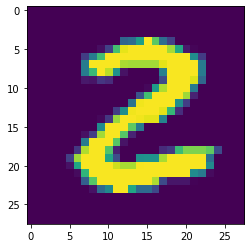

In [99]:
randomIndex = 10
print("label is : ",sub_labels_train[randomIndex])
plt.imshow(sub_images_train[randomIndex].reshape(28,28))

In [101]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

indices_test = [a in [0,1,2] for a in labels_train]
sub_images_test = images_train[indices_test]
sub_images_test = np.array([np.array(x) for x in sub_images_test])
sub_labels_test = labels_train[indices_test]

In [103]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=100000).fit(sub_images_train, sub_labels_train)
linear_pred = clf.predict(sub_images_test)
print("accuracy using linear classifier is : ",clf.score(sub_images_test,sub_labels_test))
print("confusion matrix using linear classifier is ")
confusion_matrix(sub_labels_test, linear_pred)

accuracy using linear classifier is :  1.0
confusion matrix using linear classifier is 


array([[5923,    0,    0],
       [   0, 6742,    0],
       [   0,    0, 5958]])

In [ ]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(sub_images_train, sub_labels_train)
poly_pred = poly.predict(sub_images_test)
print("accuracy using polynomial kernel is : ",poly.score(sub_images_test,sub_labels_test))
print("confusion matrix using polynomial kernel is ")
confusion_matrix(sub_labels_test, poly_pred)

accuracy using polynomial kernel is :  0.9981743005960372
confusion matrix using polynomial kernel is 


array([[5912,    6,    5],
       [   0, 6733,    9],
       [   1,   13, 5944]])

In [104]:
poly = svm.SVC(kernel='poly', degree=5, C=1).fit(sub_images_train, sub_labels_train)
poly_pred = poly.predict(sub_images_test)
print("accuracy using polynomial kernel is : ",poly.score(sub_images_test,sub_labels_test))
print("confusion matrix using polynomial kernel is ")
confusion_matrix(sub_labels_test, poly_pred)

accuracy using polynomial kernel is :  0.9873274982548461
confusion matrix using polynomial kernel is 


array([[5858,   64,    1],
       [   0, 6739,    3],
       [   0,  168, 5790]])

In [ ]:
sig = svm.SVC(kernel='sigmoid', C=1).fit(sub_images_train, sub_labels_train)
sig_pred = sig.predict(sub_images_test)
print("accuracy using sig is : ",sig.score(sub_images_test,sub_labels_test))
print("confusion matrix using sigmoid kernel is ")
confusion_matrix(sub_labels_test, sig_pred)

accuracy using sig is :  0.9438328948074961
confusion matrix using sigmoid kernel is 


array([[5604,   11,  308],
       [  12, 6538,  192],
       [ 315,  208, 5435]])